# Базы данных для аналитиков. Основы ETL
## Домашнее задание 2. Изучение характера поведения пользователей

Прочитать статью и потом на основе данных к прошлому ДЗ сделать прогноз ТО на 2018 по этой методологии. И сравнить с фактом:

|ГГММ| Сумма|
|---|---|
|1801| 256798898|
|1802| 232640416|
|1803| 267994924|
|1804| 262849522|
|1805| 276933049|
|1806| 251486085|
|1807| 250559778|
|1808| 261724749|
|1809| 276675505|
|1810| 287647539|
|1811| 363102609|
|1812| 422386052|

Как результат ТЗ можете прислать скрин рассчета и сравнения.

In [59]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
%load_ext sql

In [2]:
%sql sqlite:///h1.db

'Connected: @h1.db'

In [24]:
query = '''
SELECT 
    sum(price) as Income, 
    strftime('%Y', o_date) as Year,
    strftime('%m', o_date) as Month
FROM orders
GROUP BY
    strftime('%Y', o_date),
    strftime('%m', o_date)
;'''

res = %sql $query

 * sqlite:///h1.db
Done.


In [25]:
df = res.DataFrame()

,Income,Year,Month
0,96800035.0,2016,01
1,95424814.0,2016,02
2,115252660.0,2016,03
3,139303950.0,2016,04
4,108568402.0,2016,05
5,116656689.0,2016,06
6,113172323.0,2016,07
7,139540034.0,2016,08
8,152893399.0,2016,09
9,211601928.0,2016,10


In [60]:
ds_2016 = df[df.Year == '2016'][['Month', 'Income']]
ds_2017 = df[df.Year == '2017'][['Month', 'Income']]

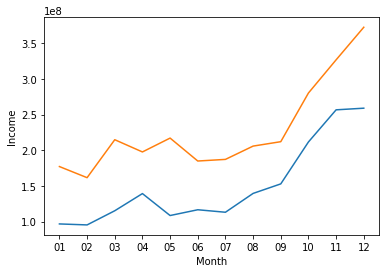

In [65]:
sns.lineplot('Month', 'Income', data=ds_2016)
sns.lineplot('Month', 'Income', data=ds_2017)

In [38]:
def delta_income(datalist):
    result = [1, ]
    for i in range(1,len(datalist)):
        result.append(datalist[i]/datalist[i-1])
    return result

In [45]:
df['delta'] = delta_income(df.Income.to_numpy())

In [48]:
np.corrcoef(df.Income.to_numpy())

1.0